In [1]:
import pandas as pd
import numpy as np
import datetime, random, json, time, requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200

In [2]:
df_CST = pd.read_csv(r'./tokenCST_prices.csv', sep='\t', index_col=0)
df_AA = pd.read_csv(r'./tokenAA_prices.csv', sep='\t',  index_col=0)

In [3]:
x = [datetime.datetime.strptime(str(d),'%Y-%m-%d %H:%M:%S') for d in df_CST.index]
y = [datetime.datetime.strptime(str(d),'%Y-%m-%d %H:%M:%S') for d in df_AA.index]
df_AA.index = y
df_CST.index = x

In [7]:
# MA Trading Strategy
## TokenCST

# Calculate short and long MA
short_MACST = df_CST.rolling(window=20).mean()
long_MACST = df_CST.rolling(window=100).mean()
ema_CST = df_CST.ewm(span=20, adjust=False).mean()

# The logic of the strategy can be summarized by the following:
#   - when the short_MA crosses long_MA upwards, we buy the asset
#   - when the short_MA crosses long_MA downwards, we sell the asset

first_trading_positions_raw_CST = short_MACST - long_MACST
first_trading_positions_CST = first_trading_positions_raw_CST.apply(np.sign) * 1/2
first_trading_positions_final_CST = first_trading_positions_CST.shift(1)


second_trading_positions_raw_CST = ema_CST - short_MACST
second_trading_positions_CST = second_trading_positions_raw_CST.apply(np.sign) * 1/2
second_trading_positions_final_CST = second_trading_positions_CST.shift(1)

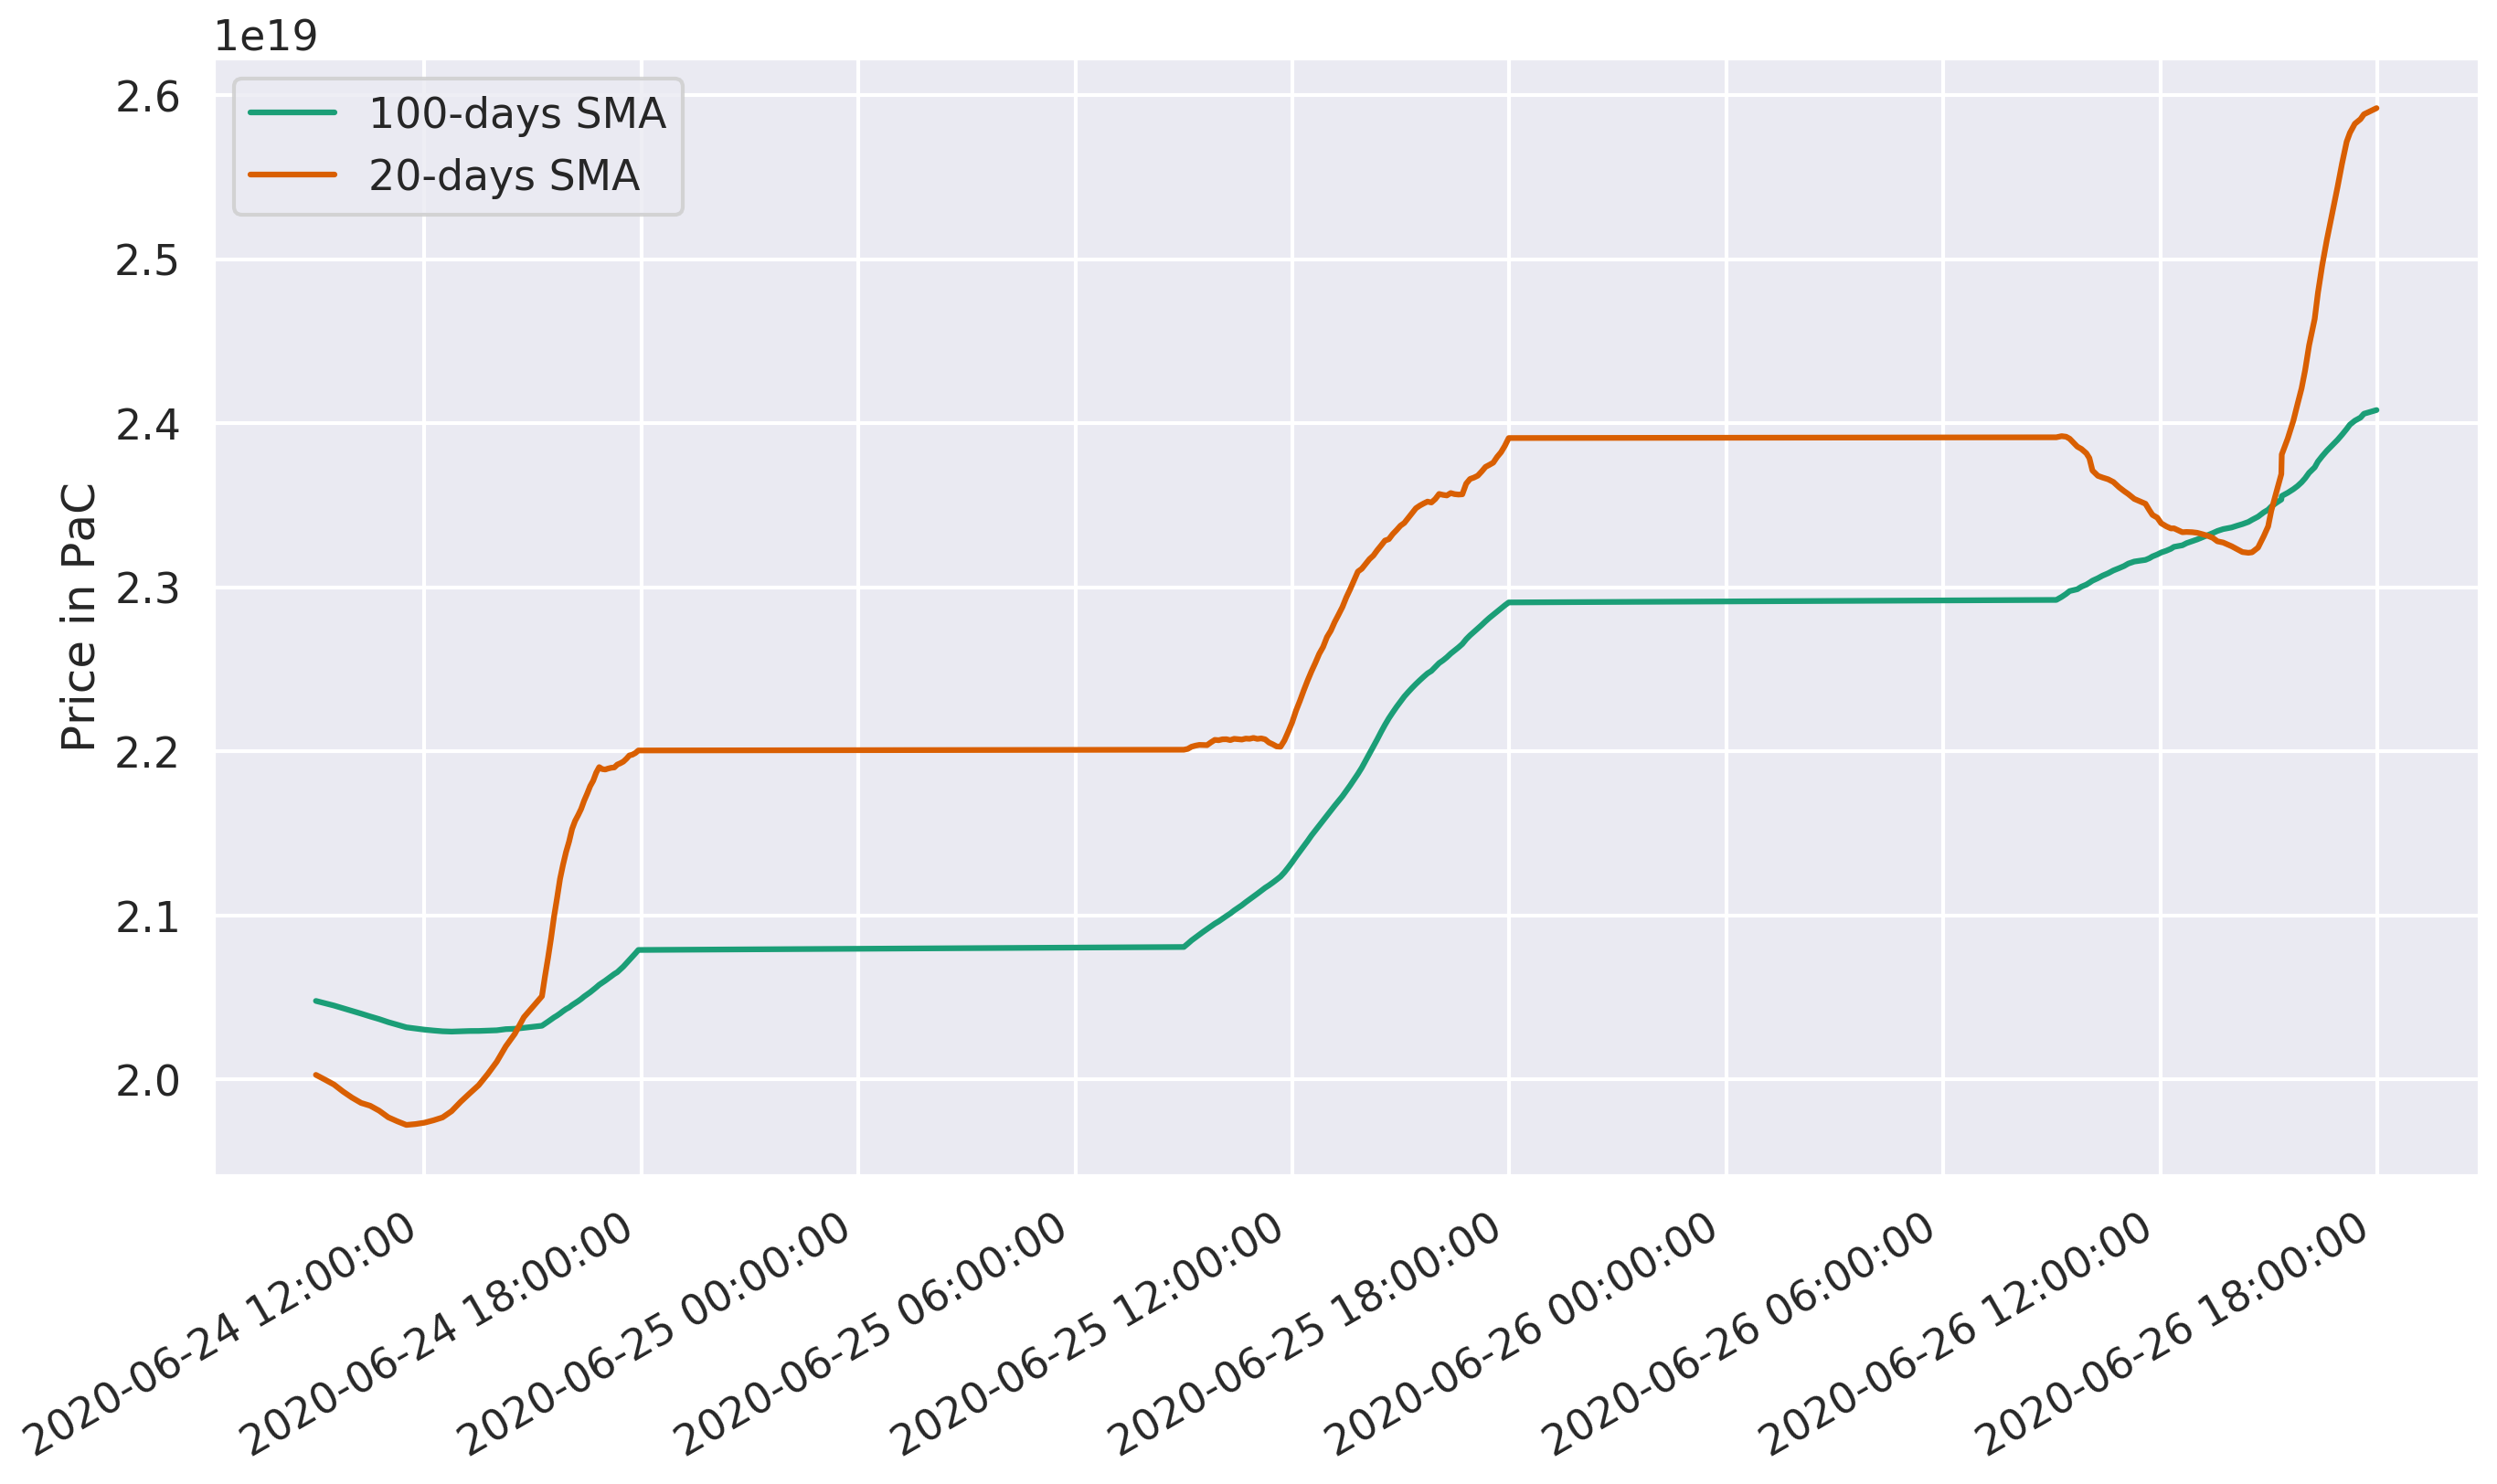

In [26]:
start_date = '2020-06-24 09:00:00'
end_date = '2020-06-26 18:00:00'

fig, ax = plt.subplots(figsize=(16,9))

#ax.plot(df_CST.loc[start_date:end_date, :].index, df_CST.loc[start_date:end_date, 'TokenCST'], label='Price')
ax.plot(long_MACST.loc[start_date:end_date, :].index, long_MACST.loc[start_date:end_date, 'TokenCST'], label = '100-days SMA')
ax.plot(short_MACST.loc[start_date:end_date, :].index, short_MACST.loc[start_date:end_date, 'TokenCST'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in PaC')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

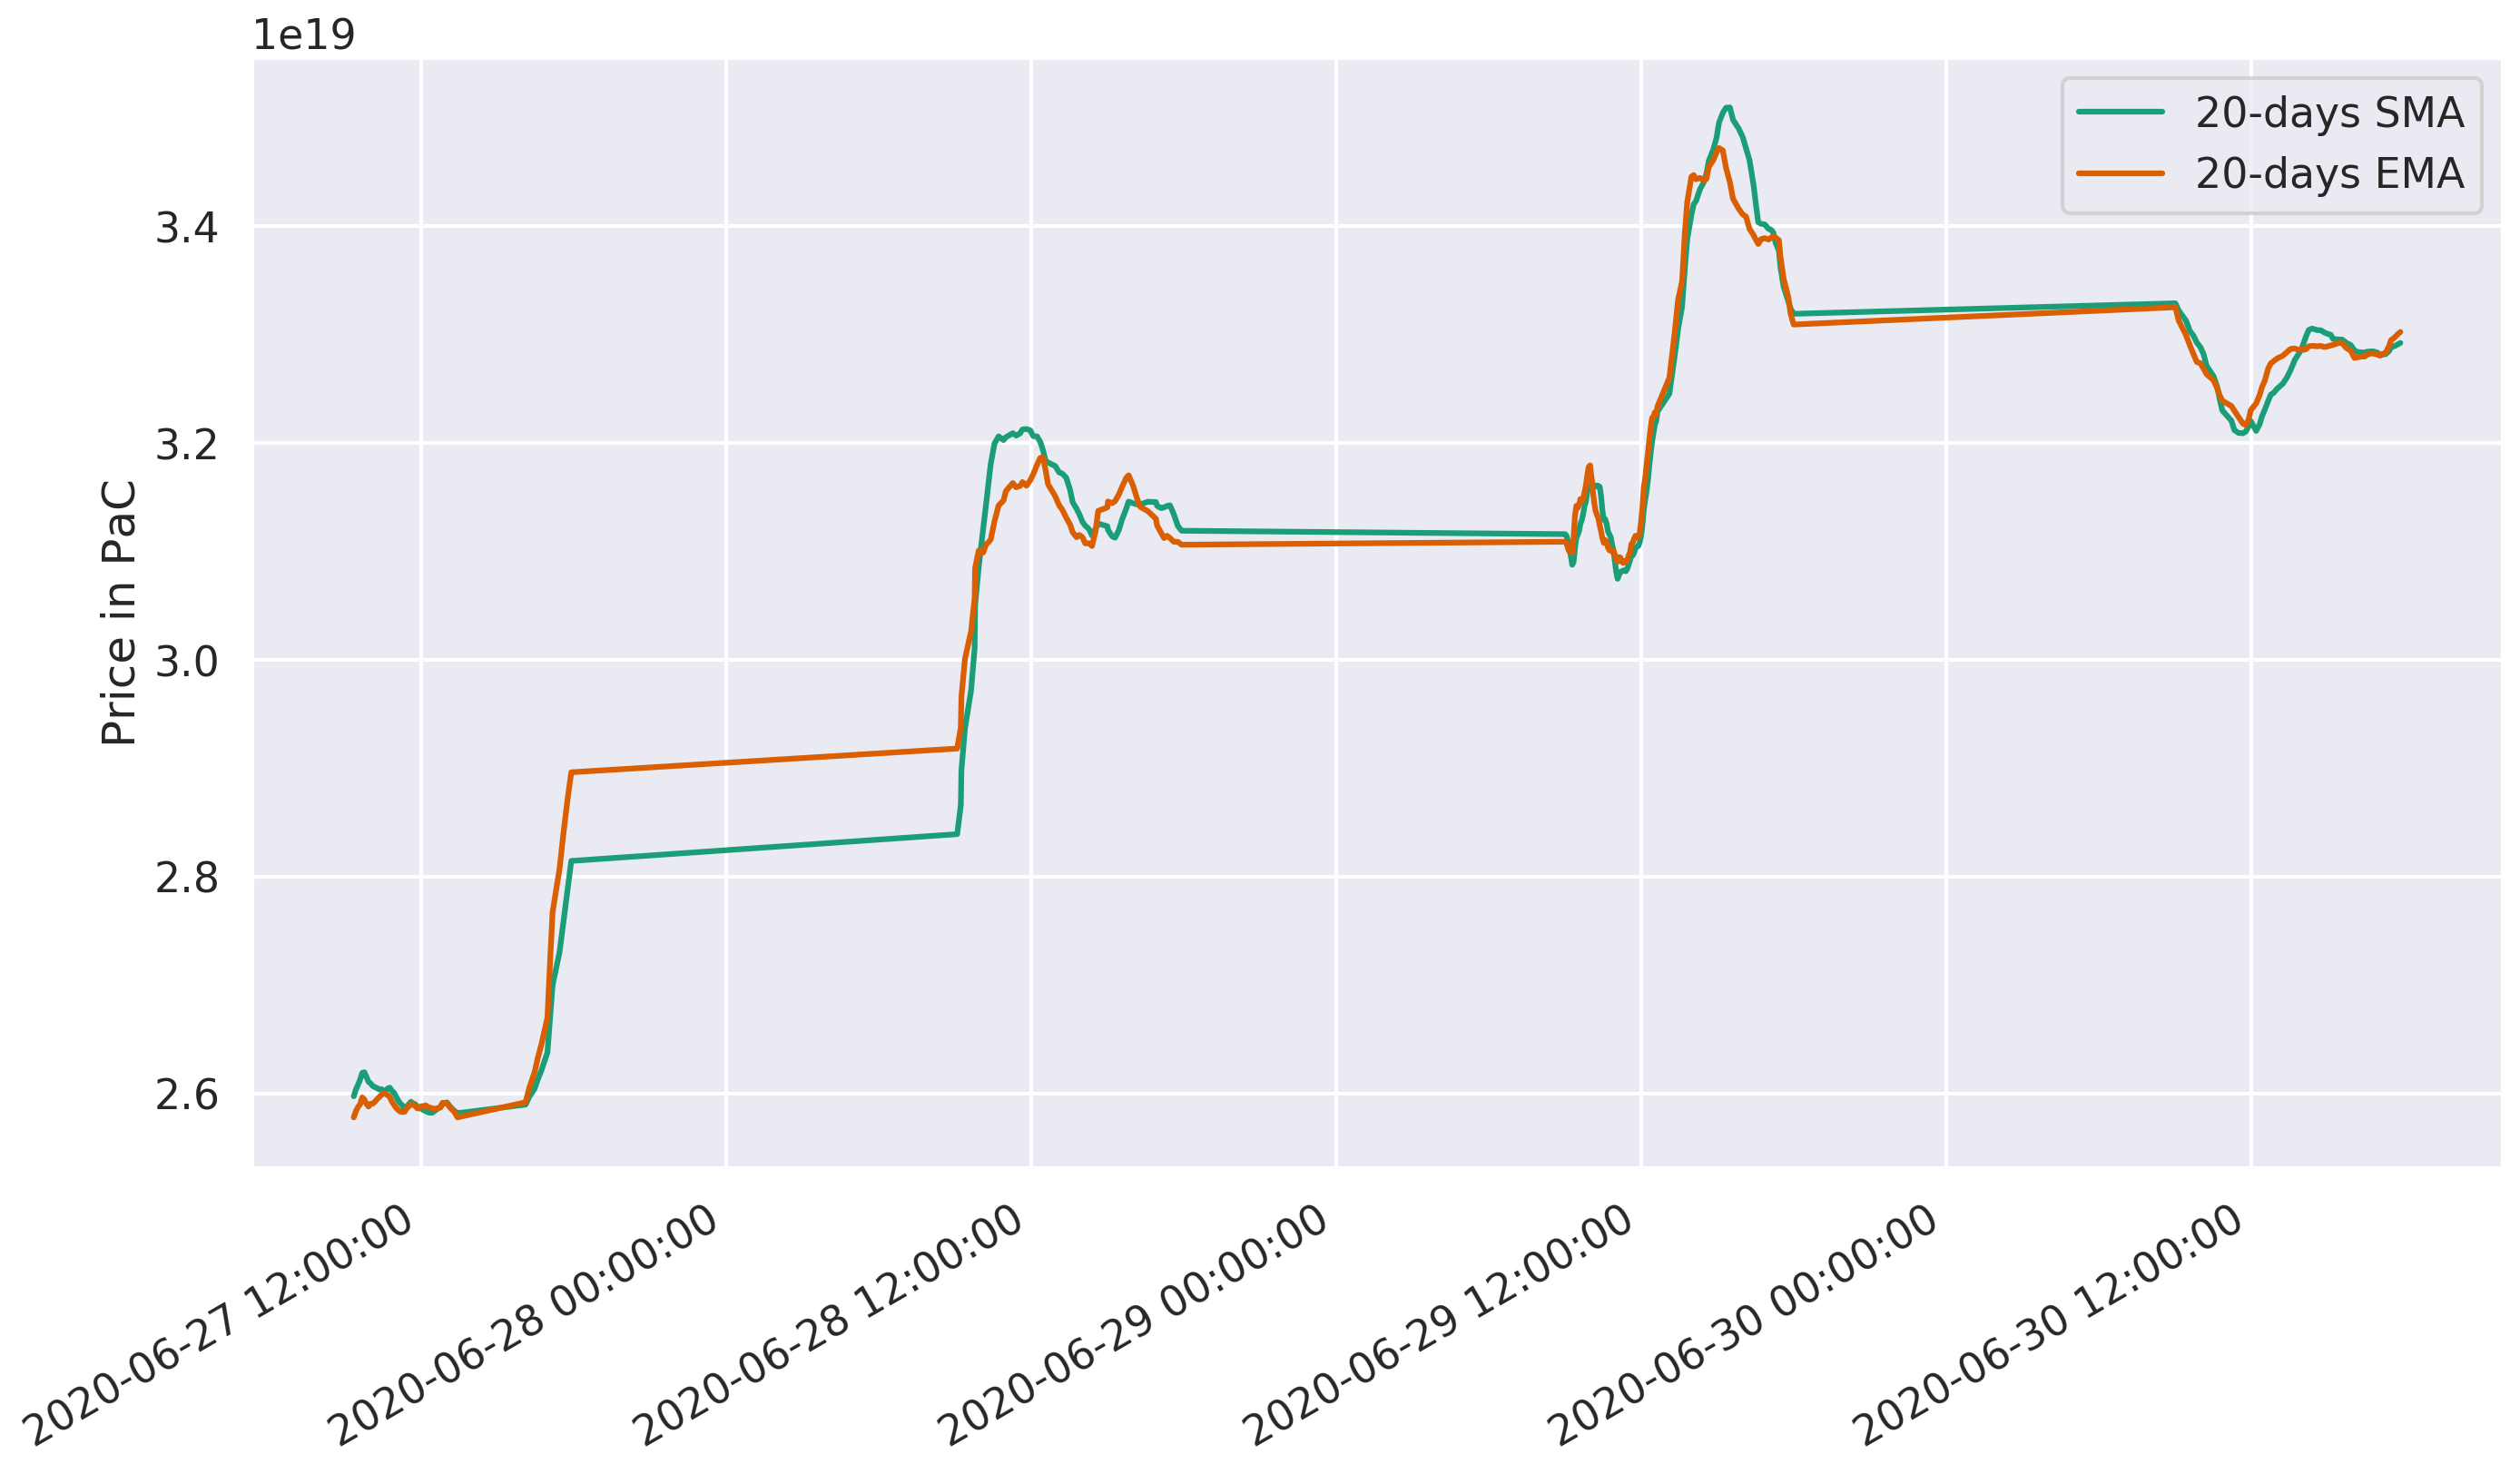

In [27]:
start_date = '2020-06-27 09:00:00'
end_date = '2020-06-30 18:00:00'

fig, ax = plt.subplots(figsize=(16,9))

#ax.plot(df_CST.loc[start_date:end_date, :].index, df_CST.loc[start_date:end_date, 'TokenCST'], label='Price')
#ax.plot(long_MACST.loc[start_date:end_date, :].index, long_MACST.loc[start_date:end_date, 'TokenCST'], label = '100-days SMA')
ax.plot(short_MACST.loc[start_date:end_date, :].index, short_MACST.loc[start_date:end_date, 'TokenCST'], label = '20-days SMA')
ax.plot(ema_CST.loc[start_date:end_date, :].index, ema_CST.loc[start_date:end_date, 'TokenCST'], label = '20-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in PaC')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

In [29]:
for i in range(8815, 9021): 
    if(first_trading_positions_final_CST.iloc[i + 1]['TokenCST'] > first_trading_positions_final_CST.iloc[i]['TokenCST']): 
        print('Buy Signal', first_trading_positions_final_CST.iloc[i])
    if(first_trading_positions_final_CST.iloc[i + 1]['TokenCST'] < first_trading_positions_final_CST.iloc[i]['TokenCST']): 
        print('Sell Signal', first_trading_positions_final_CST.iloc[i])

Buy Signal TokenCST   -0.5
Name: 2020-06-24 14:45:00, dtype: float64
Sell Signal TokenCST    0.5
Name: 2020-06-26 13:19:28, dtype: float64
Buy Signal TokenCST   -0.5
Name: 2020-06-26 15:12:47, dtype: float64


In [28]:
for i in range(9023, df_CST.shape[0] - 1): 
    if(second_trading_positions_final_CST.iloc[i + 1]['TokenCST'] > second_trading_positions_final_CST.iloc[i]['TokenCST']): 
        print('Buy Signal', second_trading_positions_final_CST.iloc[i])
    if(second_trading_positions_final_CST.iloc[i + 1]['TokenCST'] < second_trading_positions_final_CST.iloc[i]['TokenCST']): 
        print('Sell Signal', second_trading_positions_final_CST.iloc[i])

Buy Signal TokenCST   -0.5
Name: 2020-06-27 12:00:00, dtype: float64
Sell Signal TokenCST    0.5
Name: 2020-06-27 12:40:00, dtype: float64
Buy Signal TokenCST   -0.5
Name: 2020-06-27 12:50:00, dtype: float64
Sell Signal TokenCST    0.5
Name: 2020-06-27 12:55:00, dtype: float64
Buy Signal TokenCST   -0.5
Name: 2020-06-27 16:05:35, dtype: float64
Sell Signal TokenCST    0.5
Name: 2020-06-28 10:00:42, dtype: float64
Buy Signal TokenCST   -0.5
Name: 2020-06-28 14:37:24, dtype: float64
Sell Signal TokenCST    0.5
Name: 2020-06-28 16:16:35, dtype: float64
Buy Signal TokenCST   -0.5
Name: 2020-06-29 09:13:00, dtype: float64
Sell Signal TokenCST    0.5
Name: 2020-06-29 10:05:00, dtype: float64
Buy Signal TokenCST   -0.5
Name: 2020-06-29 10:57:00, dtype: float64
Sell Signal TokenCST    0.5
Name: 2020-06-29 14:33:07, dtype: float64
Buy Signal TokenCST   -0.5
Name: 2020-06-29 17:16:12, dtype: float64
Sell Signal TokenCST    0.5
Name: 2020-06-29 17:51:55, dtype: float64
Buy Signal TokenCST   -0.5


In [30]:
## TokenAA

# Calculate short and long MA
short_MAAA = df_AA.rolling(window=20).mean()
long_MAAA = df_AA.rolling(window=100).mean()
ema_AA = df_AA.ewm(span=20, adjust=False).mean()

# The logic of the strategy can be summarized by the following:
#   - when the short_MA crosses long_MA upwards, we buy the asset
#   - when the short_MA crosses long_MA downwards, we sell the asset

second_trading_positions_raw_AA = ema_AA -  short_MAAA
second_trading_positions_AA = second_trading_positions_raw_AA.apply(np.sign) * 1/2
second_trading_positions_final_AA = second_trading_positions_AA.shift(1)

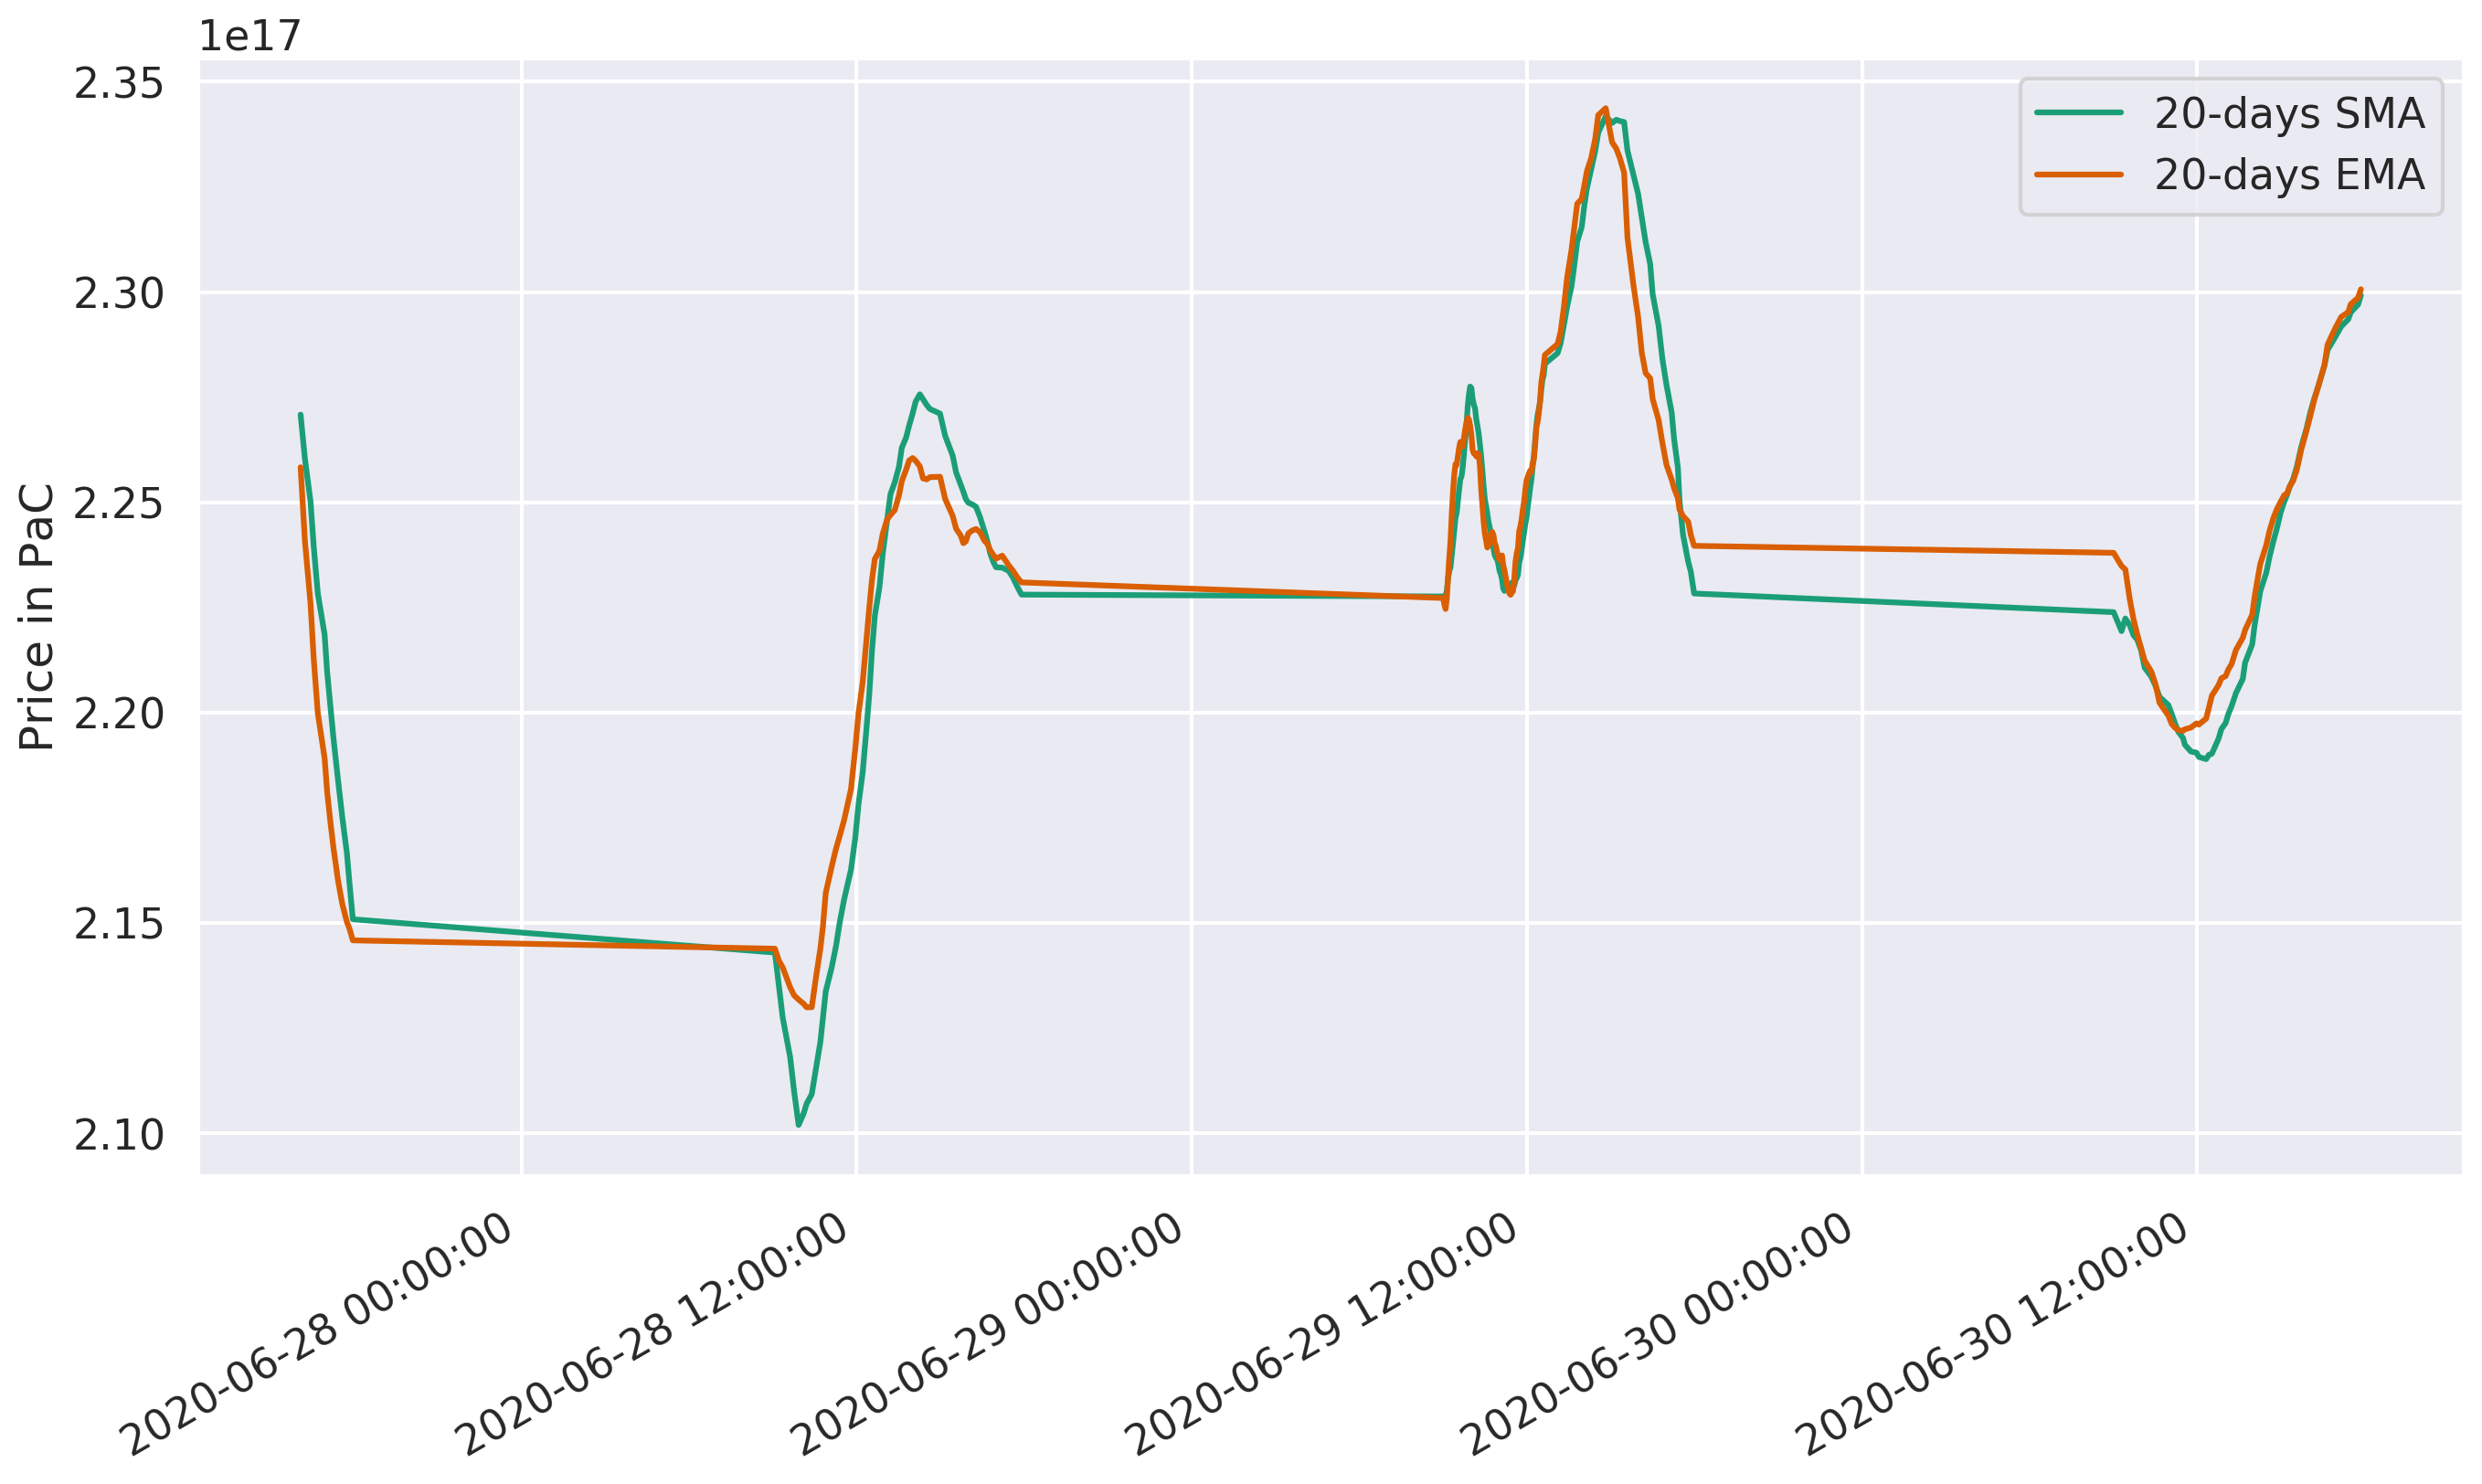

In [32]:
start_date = '2020-06-27 09:00:00'
end_date = '2020-06-30 18:00:00'

fig, ax = plt.subplots(figsize=(16,9))

#ax.plot(df_AA.loc[start_date:end_date, :].index, df_AA.loc[start_date:end_date, 'TokenAA'], label='Price')
ax.plot(short_MAAA.loc[start_date:end_date, :].index, short_MAAA.loc[start_date:end_date, 'TokenAA'], label = '20-days SMA')
ax.plot(ema_AA.loc[start_date:end_date, :].index, ema_AA.loc[start_date:end_date, 'TokenAA'], label = '20-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in PaC')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
#ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

In [34]:
for i in range(8962, df_AA.shape[0] - 1): 
    if(second_trading_positions_final_AA.iloc[i + 1]['TokenAA'] > second_trading_positions_final_AA.iloc[i]['TokenAA']): 
        print('Buy Signal', second_trading_positions_final_AA.iloc[i])
    if(second_trading_positions_final_AA.iloc[i + 1]['TokenAA'] < second_trading_positions_final_AA.iloc[i]['TokenAA']): 
        print('Sell Signal', second_trading_positions_final_AA.iloc[i])

Buy Signal TokenAA   -0.5
Name: 2020-06-28 09:04:27, dtype: float64
Sell Signal TokenAA    0.5
Name: 2020-06-28 13:12:43, dtype: float64
Buy Signal TokenAA   -0.5
Name: 2020-06-28 16:47:15, dtype: float64
Sell Signal TokenAA    0.5
Name: 2020-06-29 09:00:00, dtype: float64
Buy Signal TokenAA   -0.5
Name: 2020-06-29 09:10:32, dtype: float64
Sell Signal TokenAA    0.5
Name: 2020-06-29 09:52:40, dtype: float64
Buy Signal TokenAA   -0.5
Name: 2020-06-29 10:42:42, dtype: float64
Sell Signal TokenAA    0.5
Name: 2020-06-29 11:19:34, dtype: float64
Buy Signal TokenAA   -0.5
Name: 2020-06-29 11:32:44, dtype: float64
Sell Signal TokenAA    0.5
Name: 2020-06-29 12:14:52, dtype: float64
Buy Signal TokenAA   -0.5
Name: 2020-06-29 12:28:02, dtype: float64
Sell Signal TokenAA    0.5
Name: 2020-06-29 15:02:50, dtype: float64
Buy Signal TokenAA   -0.5
Name: 2020-06-29 17:35:21, dtype: float64
Sell Signal TokenAA    0.5
Name: 2020-06-30 10:38:51, dtype: float64
Buy Signal TokenAA   -0.5
Name: 2020-06-3